In [0]:
#module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys 
from tqdm import trange 
import time;
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd 'drive/My Drive/BTP_Code'

/content/drive/My Drive/BTP_Code


In [0]:
#data processing
dataframe = pd.read_csv('italy.csv',header=None)
data = dataframe.iloc[:,[0,2]].values
data = data[data[:,1]>0]
# x = data[:,0]
#y = np.log2(data[:,1])
arr = np.load('TopCountriesDataReverseSorted.npy')
x= np.arange(1,arr.shape[1]+1)

In [0]:
print(x)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102]


In [0]:
'''
#original data plot
plt.plot(x,y,label='original')
plt.legend()
plt.show()
'''

"\n#original data plot\nplt.plot(x,y,label='original')\nplt.legend()\nplt.show()\n"

In [0]:
#do not touch this function
def kernel_matrix_generator(x,w_1,w_2,w_3):
    kernel_matrix = np.zeros(shape=(x.shape[0],x.shape[0]))
    i=0
    for x_i in x:
        j=0
        for x_j in x:
            kernel_matrix[i,j] = kernel_formula(x_i,x_j,w_1,w_2,w_3)
            j+=1
        i+=1
    return kernel_matrix

#do not touch this function
def solver(x,y,gamma,w_1,w_2,w_3):
    kernel_matrix = kernel_matrix_generator(x,w_1,w_2,w_3)
    A = gamma*(kernel_matrix.shape[0])*np.identity(kernel_matrix.shape[0])
    A = np.add(A,kernel_matrix)
    B=y
    c = np.linalg.solve(A,B)
    return c

#do not touch this function
def predictor(x_train,x_test,y_train,gamma,w_1,w_2,w_3):
    c = solver(x_train,y_train,gamma,w_1,w_2,w_3)
    output = np.zeros(shape=(x_test.shape[0]))
    for j in range(x_test.shape[0]):
        for i in range(x_train.shape[0]):
            output[j]+=c[i]*kernel_formula(x_train[i],x_test[j],w_1,w_2,w_3)
    return output

In [0]:
def kernel_formula(x_i,x_j,w_1,w_2,w_3):
    
    #for the gaussian kernel uncomment it
    '''
    sigma = 2
    gaussian = np.exp(-np.square(np.linalg.norm(x_i-x_j))/(2*sigma*sigma))
    return gaussian
    '''
    
    #for kernel in sir's paper
    
#     w_1 = 0.852
#     w_2 = 10
#     w_3 = 0.642
    return np.power(x_i*x_j,w_1)+w_2*np.exp(-w_3*np.square(x_i-x_j))
    
    
    #sigmoid kernel
    '''
    w_1 = 0.00000002
    w_2 = 0.002
    return np.tanh(w_1*x_i*x_j+w_2)
    '''
    
    
    #sigmoid + gaussian
    '''
    sigma = 2
    w_1 = 0.0000002
    w_2 = 0.002
    return np.exp(-np.square(np.linalg.norm(x_i-x_j))/(2*sigma*sigma)) + np.tanh(w_1*x_i*x_j+w_2)
    '''
    
    #gaussian
    '''
    w_2 = 1.5
    w_3 = 0.1
    return w_2*np.exp(-w_3*np.square(x_i-x_j))
    '''
    
    
    #gaussian + sigmoid
    '''
    w_1 = 0.0002
    b = 2000
    w_2 = 0.8
    w_3 = 0.1
    return w_2*np.exp(-w_3*np.square(x_i-x_j))+(1-w_2)*np.tanh(w_1*x_i*x_j+b)
    '''
    
    #exponential
    '''
    a = 500
    r = abs(x_i-x_j)
    b = -0.1
    return a*np.exp(b*r)
    '''


#plot for both predicted and original curve
#def predictor(x_train,x_test,y_train,gamma): 
#x[:60] - training for 59 days
# preds = predictor(x[:60],x,y[:60],0.01) #change the gamma value here - regularization parameter
import math  
def MSE(yT,yP):
    N=len(yT)
    s=0
    for i in range(0,N):
       s+=(yT[i]-yP[i])**2
    return math.sqrt(s/N)
#print(MSE(preds,y))




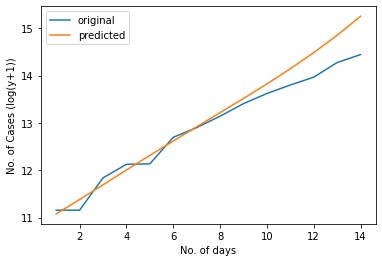

[11.07750622 11.38132629 11.69264294 12.00462462 12.31353233 12.61792617
 12.9183117  13.21690293 13.51741196 13.82483499 14.14522551 14.48545481
 14.85296427 15.25551617]


In [0]:

preds= predictor(np.arange(1,8),np.arange(1,15),arr[4][49:56],0.001,1.85,19,0.003)
plt.plot(np.arange(1,15),arr[4][49:63],label='original')
plt.plot(np.arange(1,15),preds,label='predicted')
plt.legend()
plt.xlabel('No. of days')
plt.ylabel('No. of Cases (log(y+1))')
plt.show()
print(preds)

In [0]:
def getarr(x,y,trsize,tesize,step,init):
    mapp = list()
    total=trsize+tesize
    finpreds=np.empty(0)
    for start in trange(init,x.shape[0]-total,step, file=sys.stdout, desc='Param Outer Loop'):
    #for start in range(0,x.shape[0]-30,5):
        print(start)
        #iter=iter+1
        least= float('inf')
        #for i in np.arange(0.1,2,0.4):  #range of w_1
        for i in [0.01,0.1,0.5,1,1.5,2,3]:
            # for j in np.arange (1,100,20):   #range of w_2
            for j in [1,10,50,75,100,200,300]:
                # for k in np.arange(0.003,0.01,0.004):  #range of w_3
                for k in [0.00001,0.0001,0.001,0.004,0.007,0.01,0.02]:
                    # for l in np.arange(0.001,0.01,0.01):  #range of gamma
                    for l in [0.01,0.0001]:
                      # print(i,j,k,l)
                      currpreds=predictor(x[start:start+trsize],x[start:start+total],y[start:start+trsize],l,i,j,k)
                      curr=MSE(currpreds[trsize+1:total],y[start+trsize+1:start+total]) 
                      if curr<least:
                            preds=currpreds
                            least=curr
                            w_1=i
                            w_2=j
                            w_3=k
                            gam=l
        print("w1= % 5.4f w2= % 5.4f w3= % 5.4f gam= % 5.4f mse: % 5.4f" %(w_1,w_2,w_3,gam,least)) 
        temp = np.zeros(5)
        temp[0] = x[start]
        temp[1] = w_1
        temp[2] = w_2
        temp[3] = w_3
        temp[4] = gam
        arrr = np.append(y[start:start+trsize],temp)
        mapp.append(arrr)
        # mapp=np.append(mapp, [w_1,w_2,w_3,gam])  
        finpreds= np.append(finpreds,preds[trsize:trsize+step]) ##this is just to see a good graph at the end, doesnt signify anything
    # np.reshape(mapp, (iter,24)) ##This reshape is not working, check it if you can
    #finpreds= np.append(finpreds,preds[25:])
    
    #te = time.time()
    plt.plot(x[init+trsize:start+trsize+step],y[init+trsize:start+trsize+step],label='original')
    plt.plot(x[init+trsize:start+trsize+step],finpreds,label='predicted')
    plt.legend()
    plt.xlabel('No. of days')
    plt.ylabel('No. of Cases (log(y+1))')
    plt.show()
    print (MSE(finpreds,y[trsize:start+total]))
    return mapp

Param Outer Loop:   0%|          | 0/15 [00:00<?, ?it/s]45
w1=  0.1000 w2=  1.0000 w3=  0.0000 gam=  0.0001 mse:  0.3161
Param Outer Loop:   7%|▋         | 1/15 [00:01<00:15,  1.14s/it]48
w1=  3.0000 w2=  50.0000 w3=  0.0200 gam=  0.0001 mse:  0.2311
Param Outer Loop:  13%|█▎        | 2/15 [00:02<00:14,  1.14s/it]51
w1=  0.0100 w2=  50.0000 w3=  0.0070 gam=  0.0100 mse:  0.1220
Param Outer Loop:  20%|██        | 3/15 [00:03<00:13,  1.14s/it]54
w1=  3.0000 w2=  50.0000 w3=  0.0100 gam=  0.0100 mse:  0.0581
Param Outer Loop:  27%|██▋       | 4/15 [00:04<00:12,  1.13s/it]57
w1=  1.5000 w2=  10.0000 w3=  0.0070 gam=  0.0100 mse:  0.0231
Param Outer Loop:  33%|███▎      | 5/15 [00:05<00:11,  1.14s/it]60
w1=  1.5000 w2=  200.0000 w3=  0.0010 gam=  0.0001 mse:  0.0158
Param Outer Loop:  40%|████      | 6/15 [00:06<00:10,  1.14s/it]63
w1=  0.5000 w2=  1.0000 w3=  0.0040 gam=  0.0100 mse:  0.0065
Param Outer Loop:  47%|████▋     | 7/15 [00:07<00:09,  1.14s/it]66
w1=  0.5000 w2=  50.0000 w3=  0.

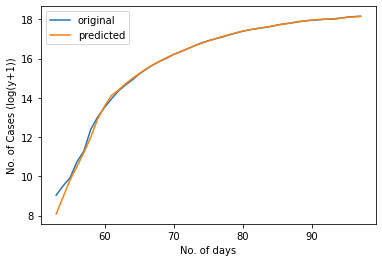

15.414895803083766
Param Outer Loop:   0%|          | 0/15 [00:00<?, ?it/s]45
w1=  0.5000 w2=  100.0000 w3=  0.0040 gam=  0.0100 mse:  0.0149
Param Outer Loop:   7%|▋         | 1/15 [00:01<00:15,  1.14s/it]48
w1=  0.5000 w2=  1.0000 w3=  0.0040 gam=  0.0100 mse:  0.0522
Param Outer Loop:  13%|█▎        | 2/15 [00:02<00:14,  1.13s/it]51
w1=  1.0000 w2=  1.0000 w3=  0.0200 gam=  0.0100 mse:  0.0263
Param Outer Loop:  20%|██        | 3/15 [00:03<00:13,  1.14s/it]54
w1=  0.1000 w2=  300.0000 w3=  0.0001 gam=  0.0001 mse:  0.0311
Param Outer Loop:  27%|██▋       | 4/15 [00:04<00:12,  1.14s/it]57
w1=  0.1000 w2=  1.0000 w3=  0.0010 gam=  0.0001 mse:  0.0452
Param Outer Loop:  33%|███▎      | 5/15 [00:05<00:11,  1.14s/it]60
w1=  2.0000 w2=  10.0000 w3=  0.0070 gam=  0.0001 mse:  0.0164
Param Outer Loop:  40%|████      | 6/15 [00:06<00:10,  1.13s/it]63
w1=  0.0100 w2=  200.0000 w3=  0.0040 gam=  0.0001 mse:  0.0081
Param Outer Loop:  47%|████▋     | 7/15 [00:07<00:09,  1.13s/it]66
w1=  1.0000 

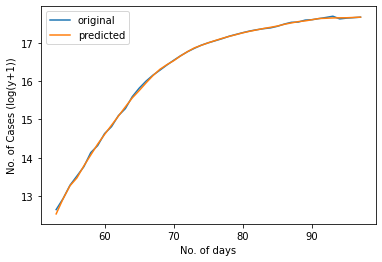

12.812854448276939


In [0]:
# mapp = getarr(x,arr[1]
finvec= list()
#for i in trange(0,arr.shape[0], file=sys.stdout, desc='Country Vector Loop'):
#for i in trange(0,1, file=sys.stdout, desc='Country Vector Loop'):

finvec.append(getarr(x,arr[0],7,5,3,45))
finvec.append(getarr(x,arr[1],7,5,3,45))
flatten_list = [j for sub in finvec for j in sub] 


In [0]:
'''
import csv

with open("testfinout5.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(flatten_list)
'''

In [0]:
# dataframe = pd.read_csv('testfinout5.csv',header=None)
data = np.asarray(flatten_list)

meta_data = data[:,:7] #7 days data

#params value
w_1 = data[:,8] 
w_2 = data[:,9]
w_3 = data[:,10]
gam = data[:,11]

In [0]:
output = np.zeros((meta_data.shape[0],6)) #output file. shape  = no of samples X params
output[:,2] = w_1
output[:,3] = w_2
output[:,4] = w_3
output[:,5] = gam

0.812634510461469


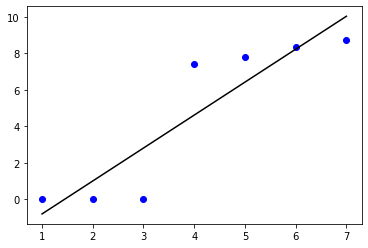

0.9962425015667983


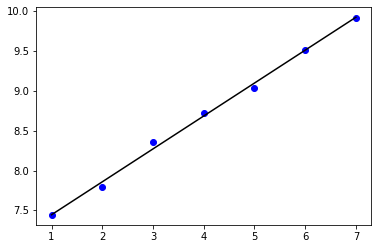

0.9658583301609732


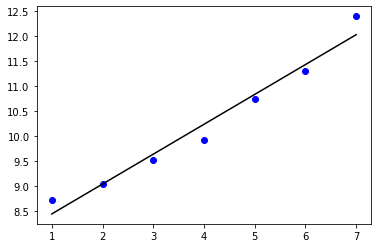

0.9842959390222542


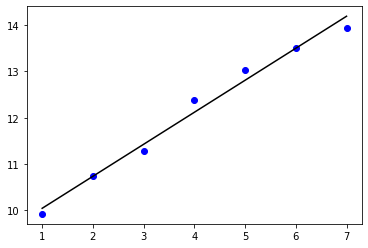

0.9798166142961358


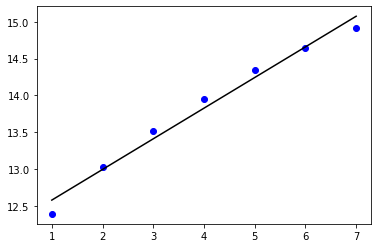

0.9927470853676096


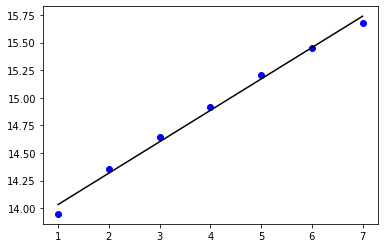

0.9888966722148931


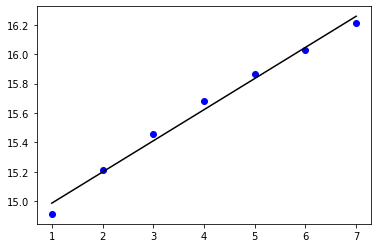

0.9976804384657234


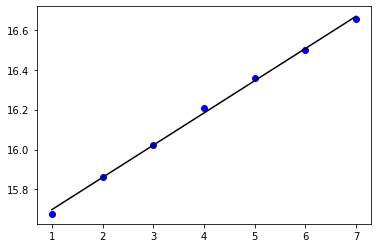

0.9952672368032798


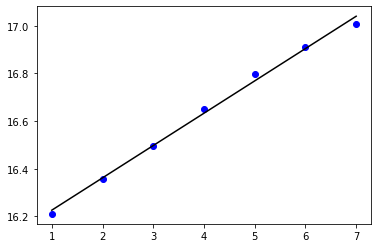

0.9950199433250427


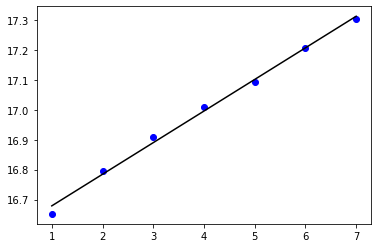

0.9923907651063492


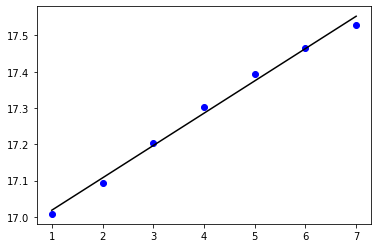

0.9917593118498185


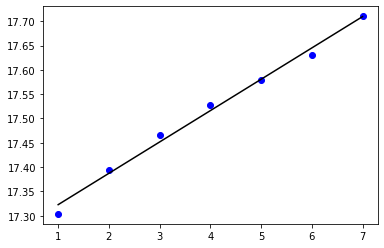

0.9963665045772129


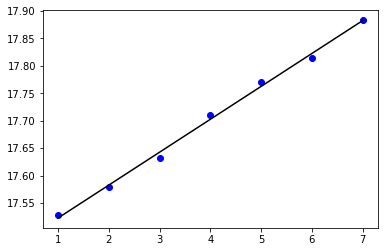

0.979720232527956


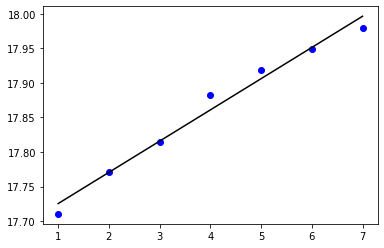

0.974077758795864


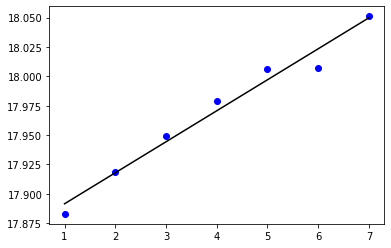

0.9626303315762506


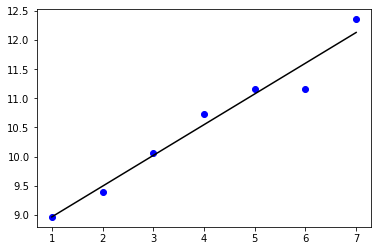

0.9465089507081336


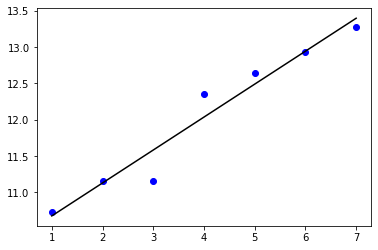

0.9975942199644731


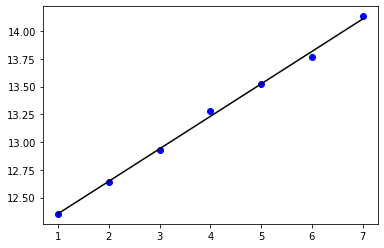

0.9949356553202364


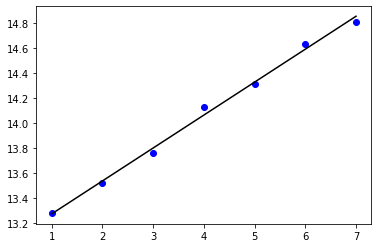

0.996019066497856


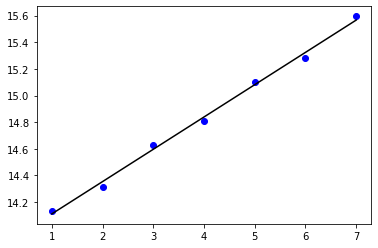

0.9913121993697868


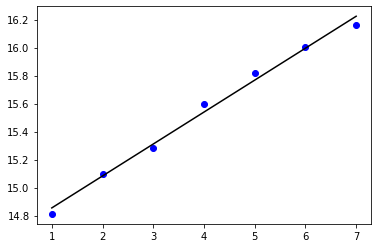

0.9880221246496161


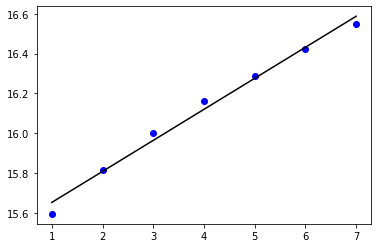

0.995839793447152


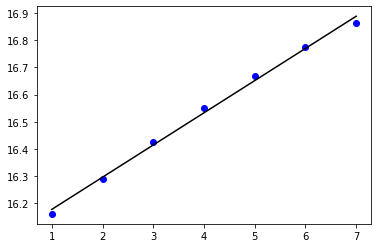

0.9818926466073532


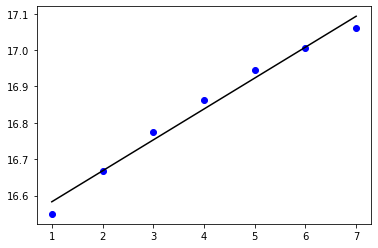

0.9951562258396932


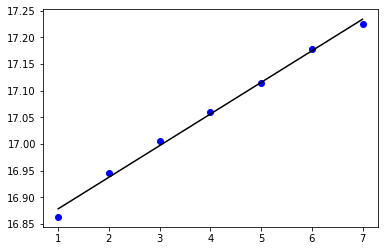

0.9918036280519902


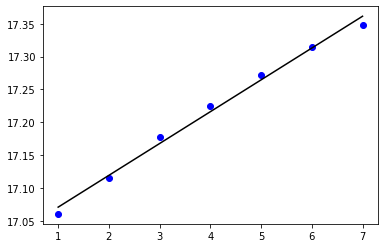

0.9865973248346347


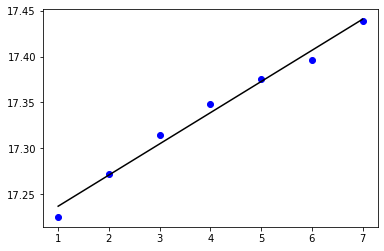

0.9732562185932642


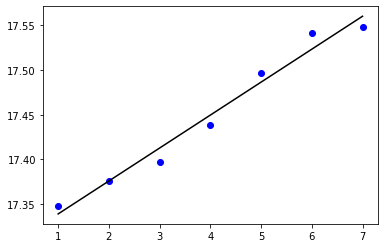

0.9591781997229902


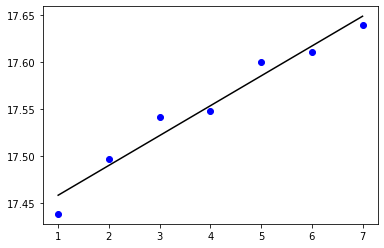

0.6331022311615779


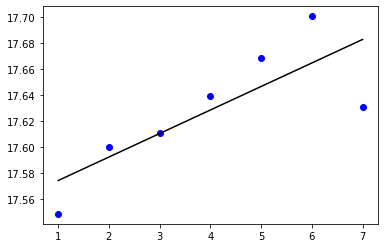

In [0]:
#it saves the data in output file and apart from that prints score of linear regression and plot of line fit on the data point
for i in range(meta_data.shape[0]):
    reg = LinearRegression().fit(np.arange(1,8).reshape(-1,1),meta_data[i].reshape(-1,1))
    output[i,1] = reg.intercept_
    temp = reg.predict(np.arange(1,8).reshape(-1,1))
    output[i,0] = (temp[1,0]-temp[0,0])
    print(reg.score(np.arange(1,8).reshape(-1,1),meta_data[i].reshape(-1,1)))
    plt.scatter(np.arange(1,8), meta_data[i], color ='b')
    plt.plot(np.arange(1,8), temp, color ='k') 
    plt.show()

In [0]:
#data processing
np.save('LRP2.npy',output)
data = output
print(len(data))
train_x = data[:,:2]
y_w1 = data[:,2]
y_w2 = data[:,3]
y_w3 = data[:,4]
y_gam = data[:,5]
# y_gam = data[:,11]

30


In [0]:
train_x.shape

(30, 2)

In [0]:
#do not touch this function
def kernel_matrix_generator2(x,w_1,w_2):
    kernel_matrix = np.zeros(shape=(x.shape[0],x.shape[0]))
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            kernel_matrix[i,j] = kernel_formula2(x[i],x[j],w_1,w_2)
    return kernel_matrix

#do not touch this function
def solver2(x,y,gamma,w_1,w_2):
    kernel_matrix = kernel_matrix_generator2(x,w_1,w_2)
    A = gamma*(kernel_matrix.shape[0])*np.identity(kernel_matrix.shape[0])
    A = np.add(A,kernel_matrix)
    B = y
    c = np.linalg.solve(A,B)
    return c

#do not touch this function
def predictor2(x_train,x_test,y_train,gamma,w_1,w_2):
    c = solver2(x_train,y_train,gamma,w_1,w_2)
    output = np.zeros(shape=(x_test.shape[0]))
    for j in range(x_test.shape[0]):
        for i in range(x_train.shape[0]):
            output[j]+=c[i]*kernel_formula2(x_train[i],x_test[j],w_1,w_2)
    return c,output

#do not touch this function
def kernel_formula2(x_i,x_j,w_1,w_2):
    temp = np.square(np.linalg.norm(x_i-x_j))
    return np.exp(-w_2*temp)


In [0]:
c1,preds1 = predictor2(train_x,train_x,y_w1,0.00000001,10000,20)
c2,preds2 = predictor2(train_x,train_x,y_w2,0.00000001,10000,20)
c3,preds3 = predictor2(train_x,train_x,y_w3,0.00000001,10000,20)
c4,predsG = predictor2(train_x,train_x,y_gam,0.00000001,10000,20)
arr = np.zeros((4,30))
arr[0] =c1
arr[1] =c2
arr[2] =c3
arr[3] =c4
np.save('cValues2.npy',arr)


In [0]:
data

array([[ 1.80982456e+00, -2.62302838e+00,  1.00000000e-01,
         1.00000000e+00,  1.00000000e-05,  1.00000000e-04],
       [ 4.13009575e-01,  7.03215322e+00,  3.00000000e+00,
         5.00000000e+01,  2.00000000e-02,  1.00000000e-04],
       [ 5.97076459e-01,  7.84152726e+00,  1.00000000e-02,
         5.00000000e+01,  7.00000000e-03,  1.00000000e-02],
       [ 6.92094921e-01,  9.34808537e+00,  3.00000000e+00,
         5.00000000e+01,  1.00000000e-02,  1.00000000e-02],
       [ 4.16387933e-01,  1.21608769e+01,  1.50000000e+00,
         1.00000000e+01,  7.00000000e-03,  1.00000000e-02],
       [ 2.84185075e-01,  1.37488782e+01,  1.50000000e+00,
         2.00000000e+02,  1.00000000e-03,  1.00000000e-04],
       [ 2.11980810e-01,  1.47738396e+01,  5.00000000e-01,
         1.00000000e+00,  4.00000000e-03,  1.00000000e-02],
       [ 1.61512091e-01,  1.55373212e+01,  5.00000000e-01,
         5.00000000e+01,  1.00000000e-03,  1.00000000e-04],
       [ 1.35644438e-01,  1.60905791e+01,  2.000